In [2]:
import os, gc
import pygrib
import numpy as np
import pandas as pd
import xarray as xr
import multiprocessing as mp
import matplotlib.pyplot as plt 


from glob import glob
from functools import partial
from matplotlib import gridspec
from datetime import datetime, timedelta

os.environ['OMP_NUM_THREADS'] = '1'

nbm_dir = '/scratch/general/lustre/u1070830/nbm/'
urma_dir = '/scratch/general/lustre/u1070830/urma/'
tmp_dir = '/scratch/general/lustre/u1070830/tmp/'
os.makedirs(tmp_dir, exist_ok=True)

In [3]:
def calc_pbin(pbin, _bint, _thresh, _data, _urma):

    p0, p1 = pbin-_bint/2, pbin+_bint/2
    N = xr.where((_data >= p0) & (_data < p1), 1, 0).sum().values
    n = xr.where((_data >= p0) & (_data < p1) & (_urma > _thresh), 1, 0).sum().values
    
    return pbin, n, N

In [4]:
extract_dir = nbm_dir + 'extract/'
extract_flist = sorted(glob(extract_dir + '*'))

In [4]:
if not os.path.isfile(urma_dir + 'agg/urma_agg.nc'):
    print('URMA aggregate not found')

else:
    print('Getting URMA aggregate from file')
    urma_whole = xr.open_dataset(urma_dir + 'agg/urma_agg.nc')['apcp24h_mm']

urma_whole = urma_whole/25.4
urma_whole = urma_whole.rename('apcp24h_in')

Getting URMA aggregate from file


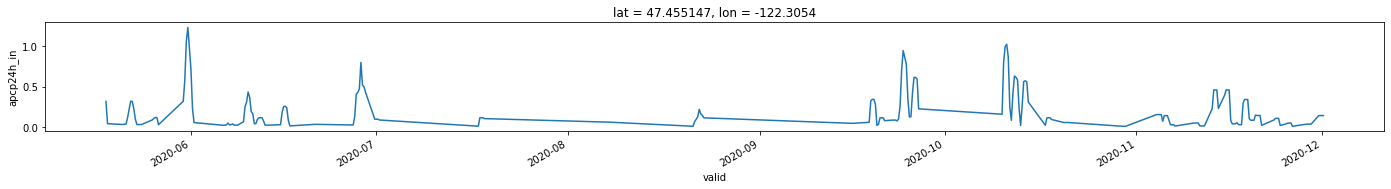

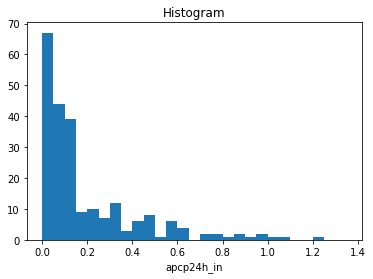

In [5]:
#KSEA LATITUDE: 47.44472 
# LONGITUDE: -122.31361
sitelat, sitelon = 47.44472, -122.31361

lons = urma_whole.lon.values
lats = urma_whole.lat.values

idx1d = (np.abs(lons-sitelon) + np.abs(lats-sitelat))
urma_idx = np.unravel_index(np.argmin(idx1d, axis=None), idx1d.shape)

urma_sample = urma_whole.isel(x=urma_idx[1], y=urma_idx[0])
urma_sample[urma_sample >= 0.01].plot(figsize=(24, 2))
plt.show()
urma_sample[urma_sample >= 0.01].plot.hist(bins=np.arange(0, 1.4, .05))
plt.show()

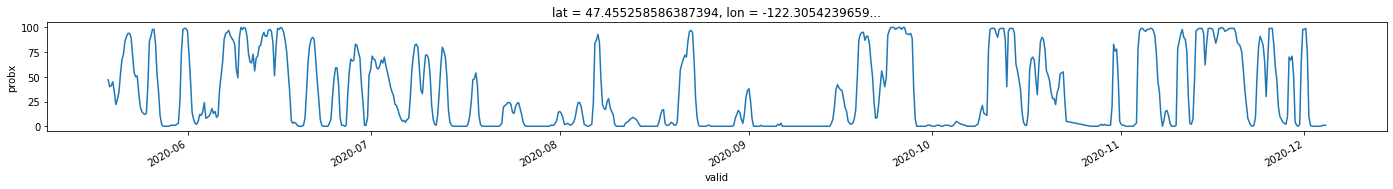

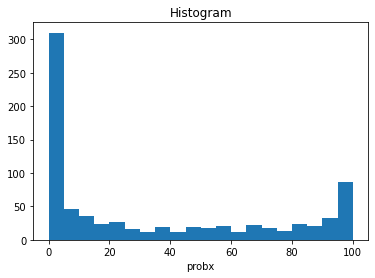

In [6]:
nbm_sample = xr.open_dataset(extract_flist[0])

lons = nbm_sample.lon.values
lats = nbm_sample.lat.values

idx1d = (np.abs(lons-sitelon) + np.abs(lats-sitelat))
nbm_idx = np.unravel_index(np.argmin(idx1d, axis=None), idx1d.shape)

nbm_sample = nbm_sample.isel(x=nbm_idx[1], y=nbm_idx[0])
nbm_sample.sel(threshold=0.01)['probx'].plot(figsize=(24, 2))
plt.show()
nbm_sample.sel(threshold=0.01)['probx'].plot.hist(bins=np.arange(0, 101, 5))
plt.show()